[nltk_data] Downloading package vader_lexicon to C:\Users\Niraj
[nltk_data]     Dagade\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Niraj Dagade\AppData\Local\Temp\ipykernel_13484\2733869301.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


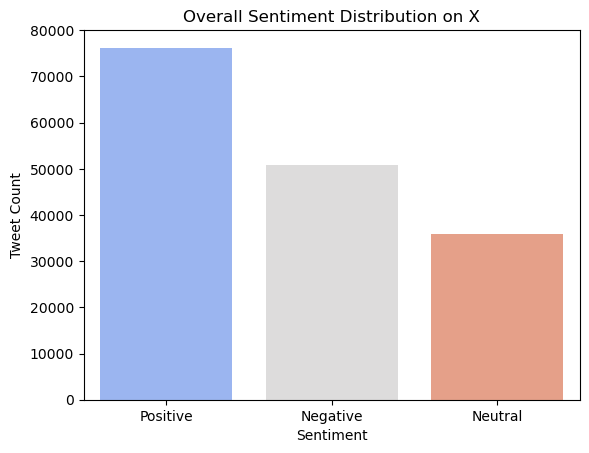

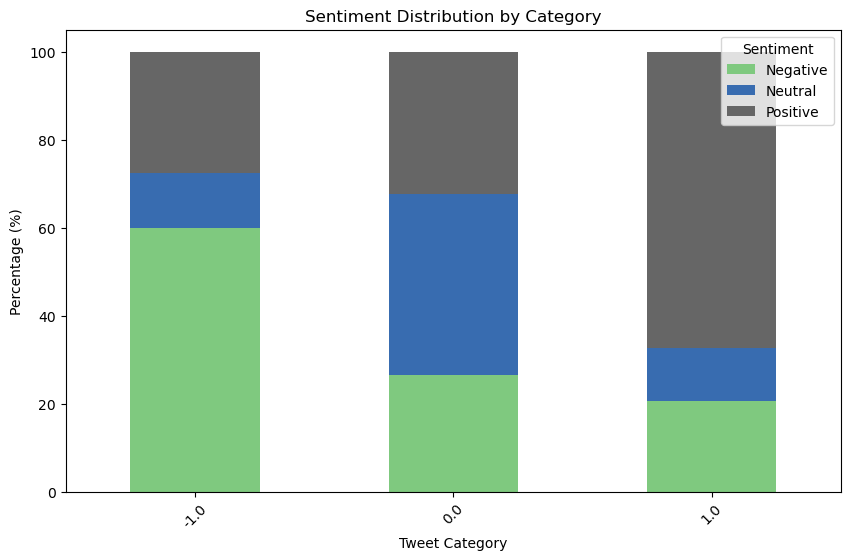

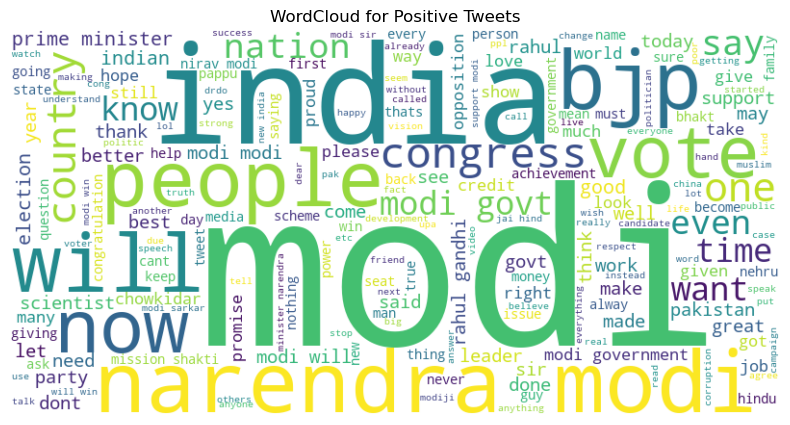

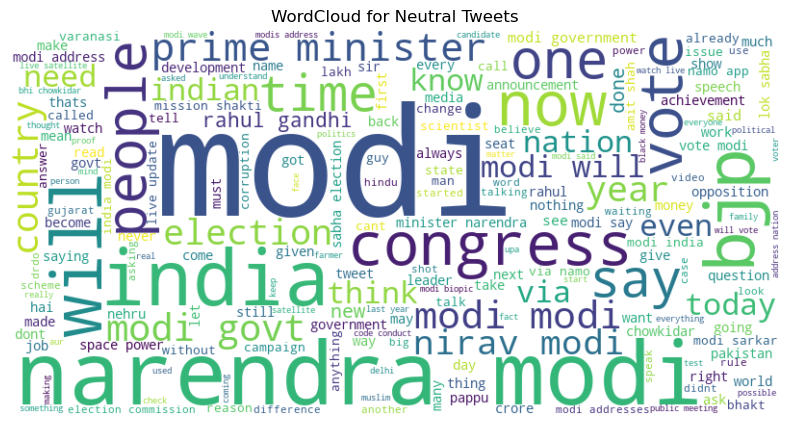

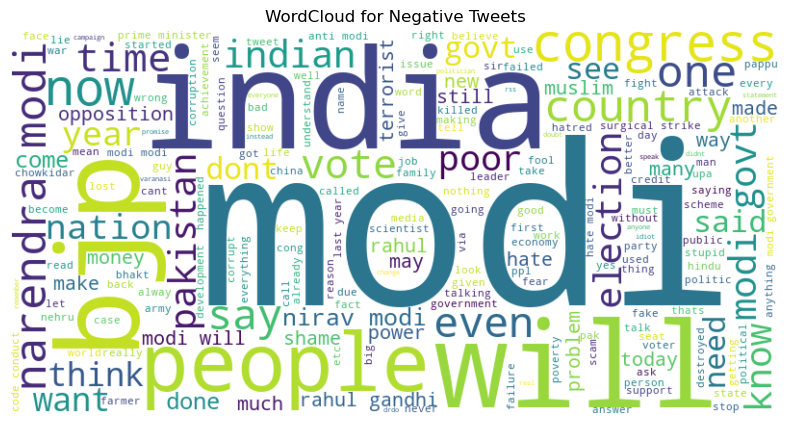

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv("X data.csv")  # Make sure the file is in the same folder or provide full path

# Drop rows with missing clean_text
df.dropna(subset=['clean_text'], inplace=True)

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment scoring
df['sentiment_score'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Label sentiment based on compound score
def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['sentiment_score'].apply(label_sentiment)

# --- Visualization 1: Overall sentiment distribution ---
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title("Overall Sentiment Distribution on X")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

# --- Visualization 2: Sentiment by Category ---
category_sentiment = pd.crosstab(df['category'], df['sentiment'], normalize='index') * 100
category_sentiment.plot(kind='bar', stacked=True, colormap='Accent', figsize=(10,6))
plt.title("Sentiment Distribution by Category")
plt.ylabel("Percentage (%)")
plt.xlabel("Tweet Category")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()

# --- Visualization 3: Word Clouds for Each Sentiment ---
for sentiment_label in ['Positive', 'Neutral', 'Negative']:
    text = " ".join(df[df['sentiment'] == sentiment_label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment_label} Tweets")
    plt.show()

# Optional: Save the sentiment-tagged dataset
df.to_csv("X_data_with_sentiment.csv", index=False)
